In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read in processed CircaDB data 
circa_db = pd.read_csv('data/circa_db_mapped.tsv', sep = '\t')

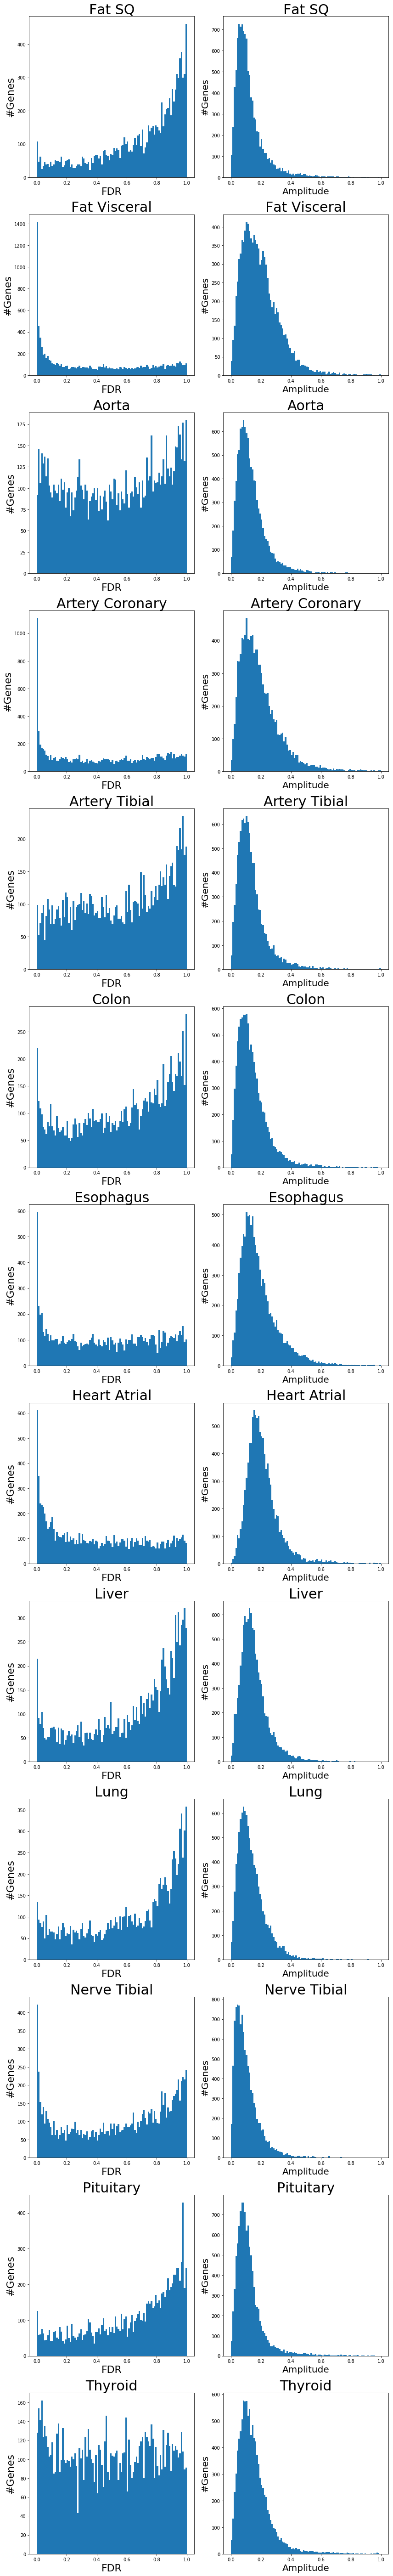

In [3]:
# CircaDB score distribution 
plt.figure(figsize = (12,78))
# For each tissue, generate the following plots
for i in range(0,13):
    tissue_type = circa_db.columns[i+1].split('_')[0]
    
    # FDR
    ax = plt.subplot(13, 2, 2*i+1)
    axh = ax.hist(circa_db.iloc[:,i+1], bins = 100, range = (0,1))
    ax.set_title(tissue_type, size = 30)
    ax.set_xlabel('FDR', size = 22)
    ax.set_ylabel('#Genes', size= 22)

    # amplitude
    ax = plt.subplot(13, 2, 2*i+2)
    axh = ax.hist(circa_db.iloc[:,i+14], bins = 100, range = (0,1))
    ax.set_title(tissue_type, size = 30)
    ax.set_xlabel('Amplitude', size = 20)
    ax.set_ylabel('#Genes', size= 20)

plt.tight_layout()
plt.savefig('plot/circa_db_tissue_scores.pdf')

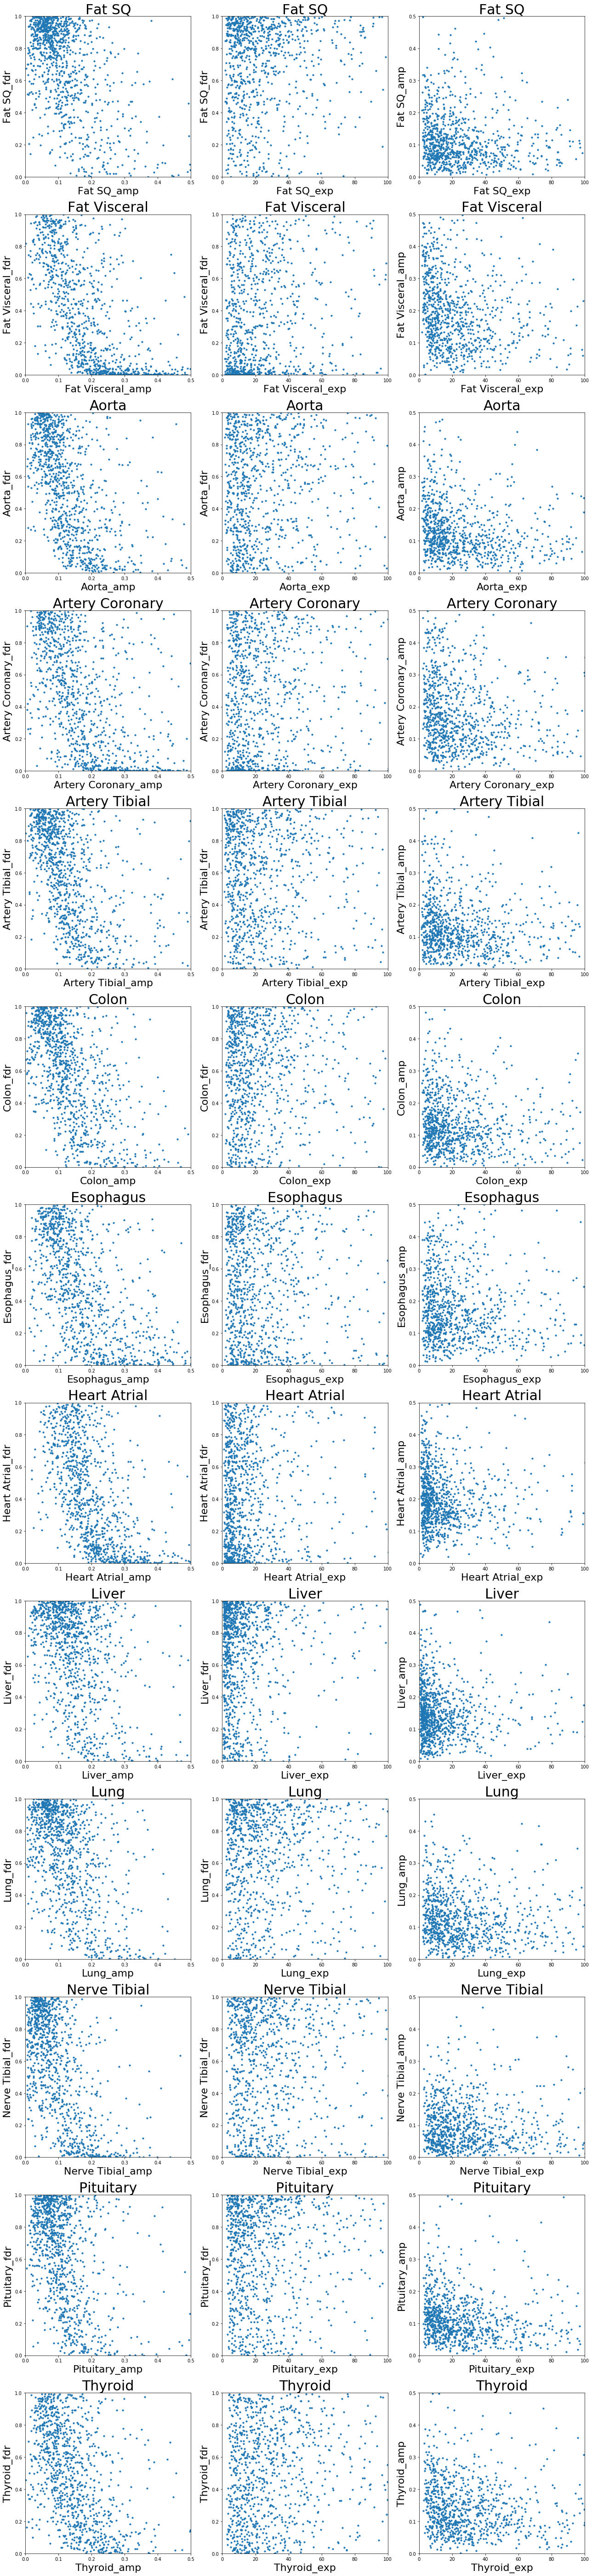

In [4]:
# Randomly select 1000 genes for score comparison 
circa_db_sub = circa_db.sample(n = 1000, axis = 0)

# Pairwise comparison among FDR, amplitude, and expression
plt.figure(figsize = (18,78))
# For each tissue, generate the following plots
for i in range(0,13):
    tissue_type = circa_db_sub.columns[i+1].split('_')[0]
    
    # FDR ~ amplitude
    ax = plt.subplot(13, 3, i*3+1)
    ax.scatter(circa_db_sub.iloc[:,i+14], circa_db_sub.iloc[:,i+1], s = 10)
    plt.xlim(0,0.5)
    plt.ylim(0,1)
    ax.set_title(tissue_type, size = 30)
    ax.set_xlabel(circa_db_sub.columns[i+14], size = 22)
    ax.set_ylabel(circa_db_sub.columns[i+1], size= 22)
    
    # FDR ~ expression 
    ax = plt.subplot(13, 3, i*3+2)
    ax.scatter(circa_db_sub.iloc[:,i+27], circa_db_sub.iloc[:,i+1], s = 10)
    plt.xlim(0,100)
    plt.ylim(0,1)
    ax.set_title(tissue_type, size = 30)
    ax.set_xlabel(circa_db_sub.columns[i+27], size = 22)
    ax.set_ylabel(circa_db_sub.columns[i+1], size= 22)
    
    # amplitude ~ expression
    ax = plt.subplot(13, 3, i*3+3)
    ax.scatter(circa_db_sub.iloc[:,i+27], circa_db_sub.iloc[:,i+14], s = 10)
    plt.xlim(0,100)
    plt.ylim(0,0.5)
    ax.set_title(tissue_type, size = 30)
    ax.set_xlabel(circa_db_sub.columns[i+27], size = 22)
    ax.set_ylabel(circa_db_sub.columns[i+14], size= 22)

plt.tight_layout()
plt.savefig('plot/circa_db_mapped_compare.pdf')

<Figure size 5616x5616 with 0 Axes>

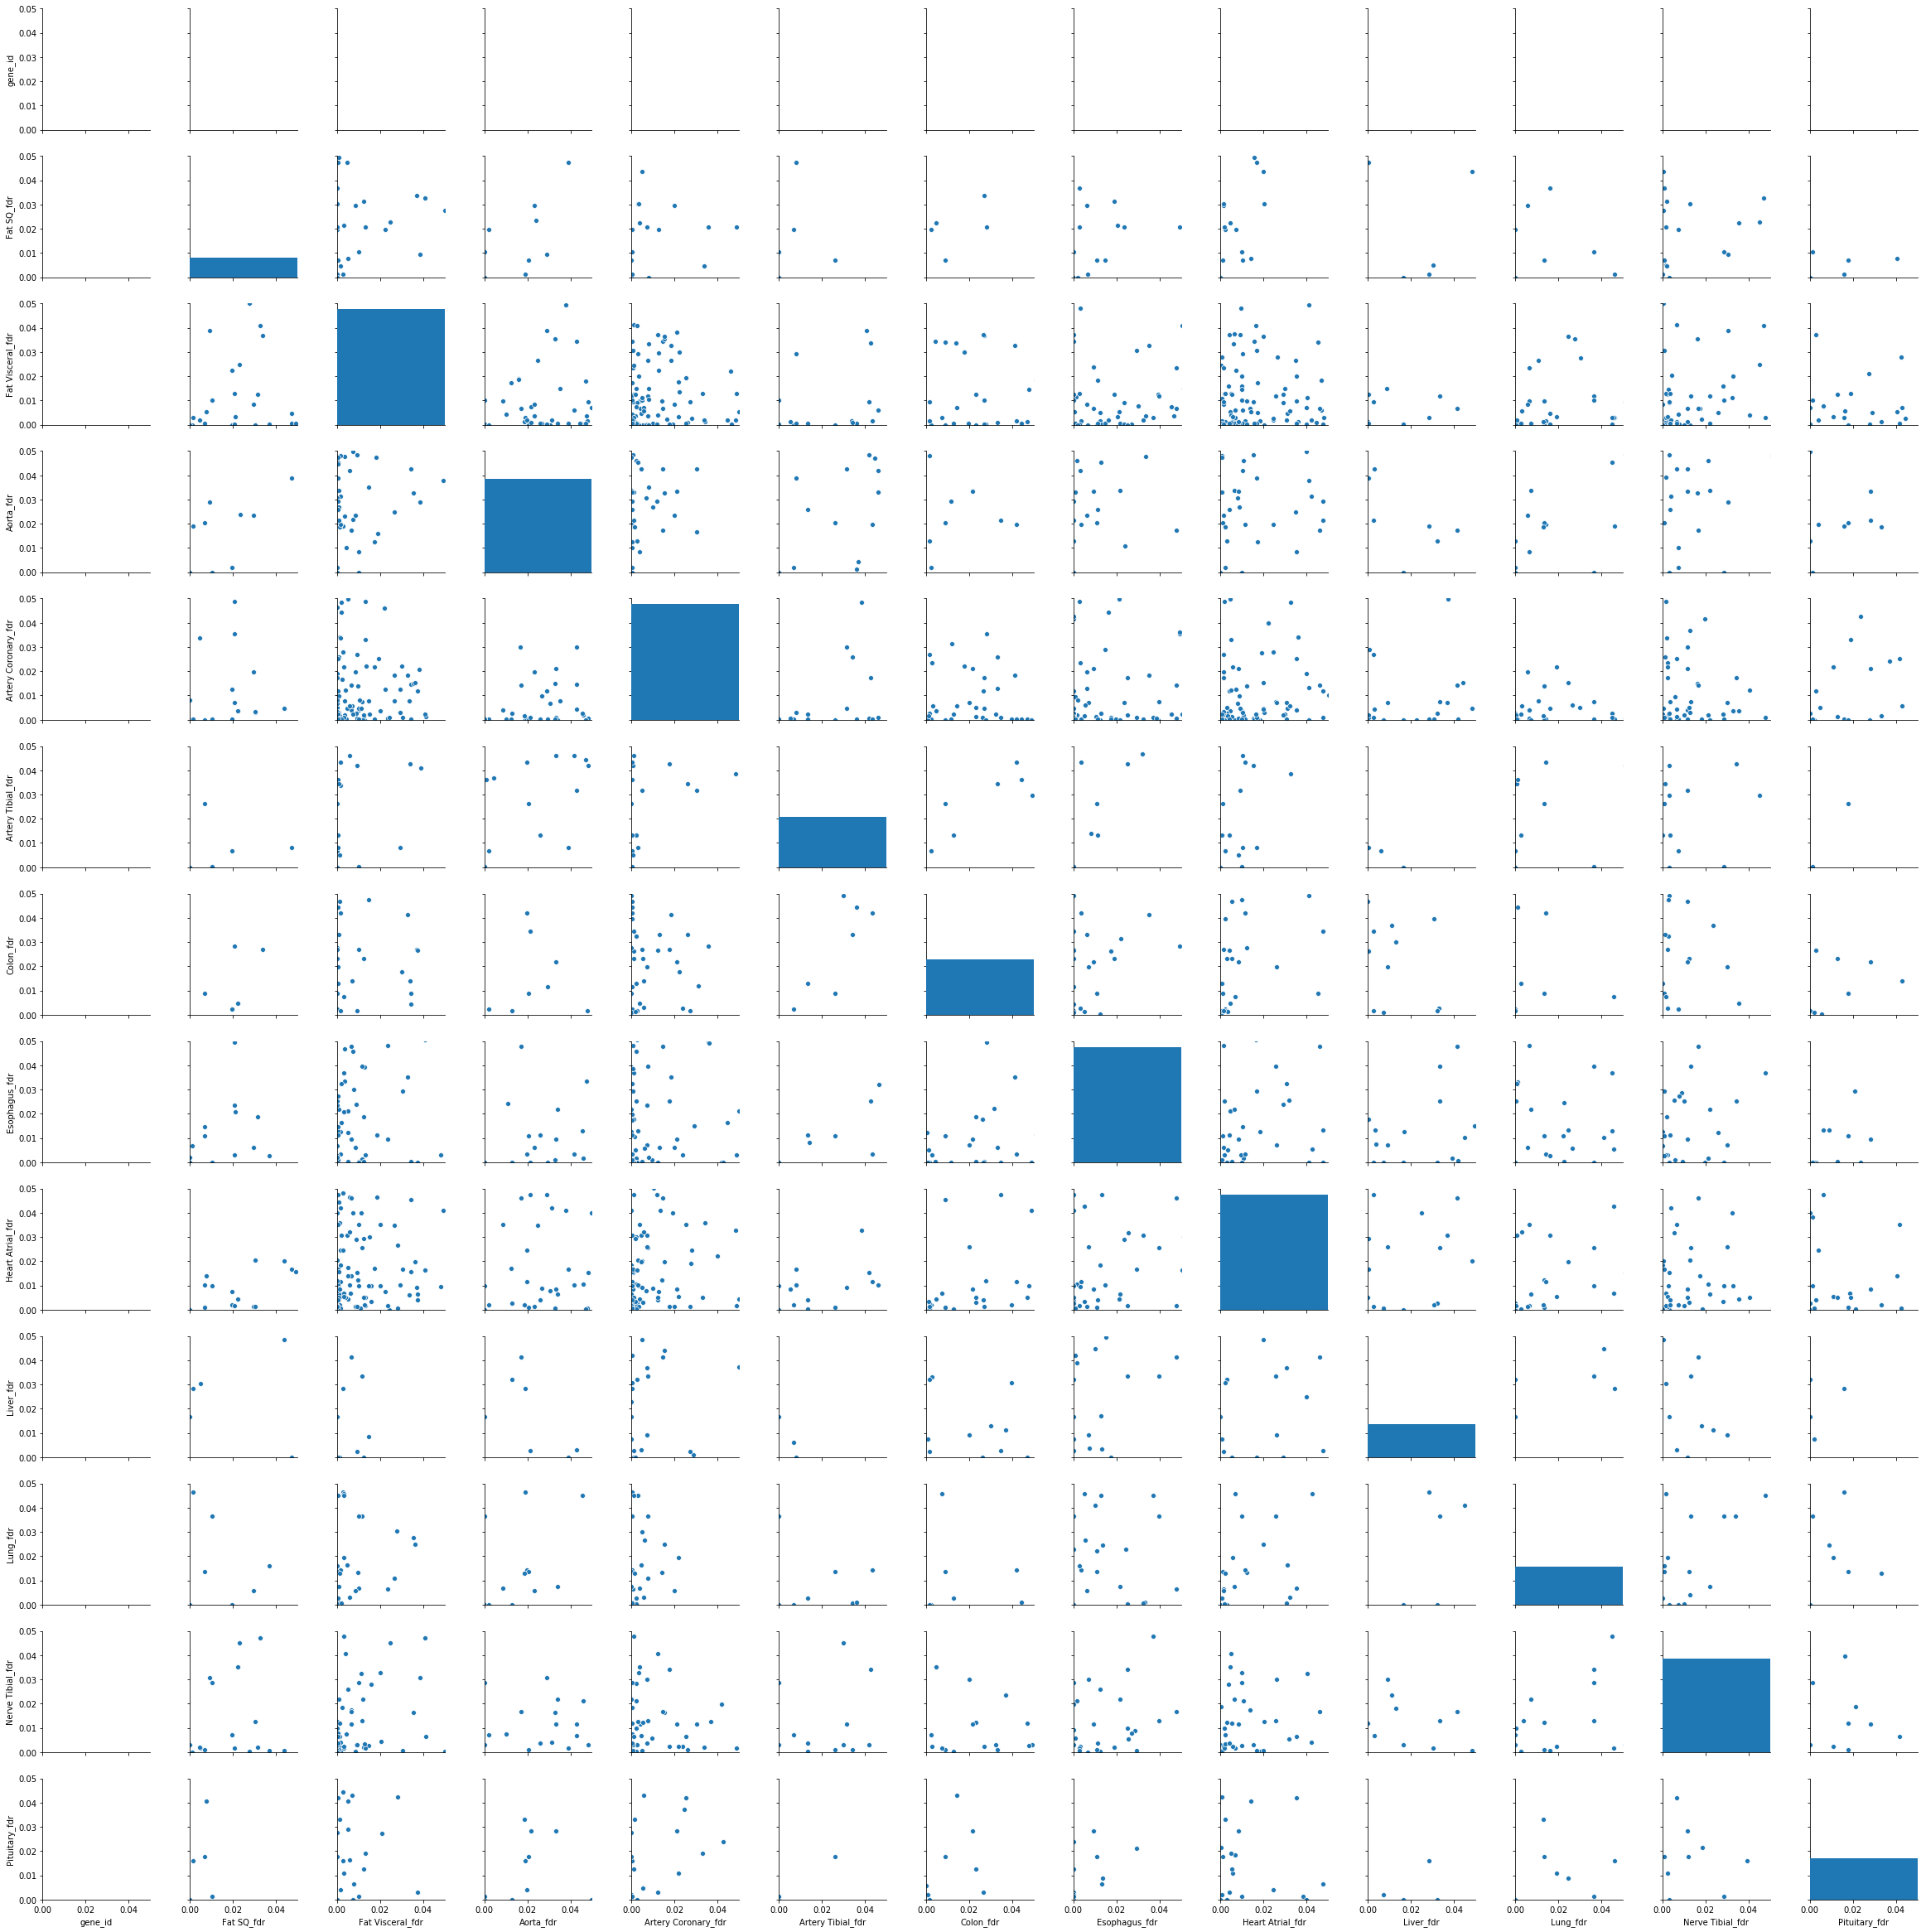

<Figure size 5616x5616 with 0 Axes>

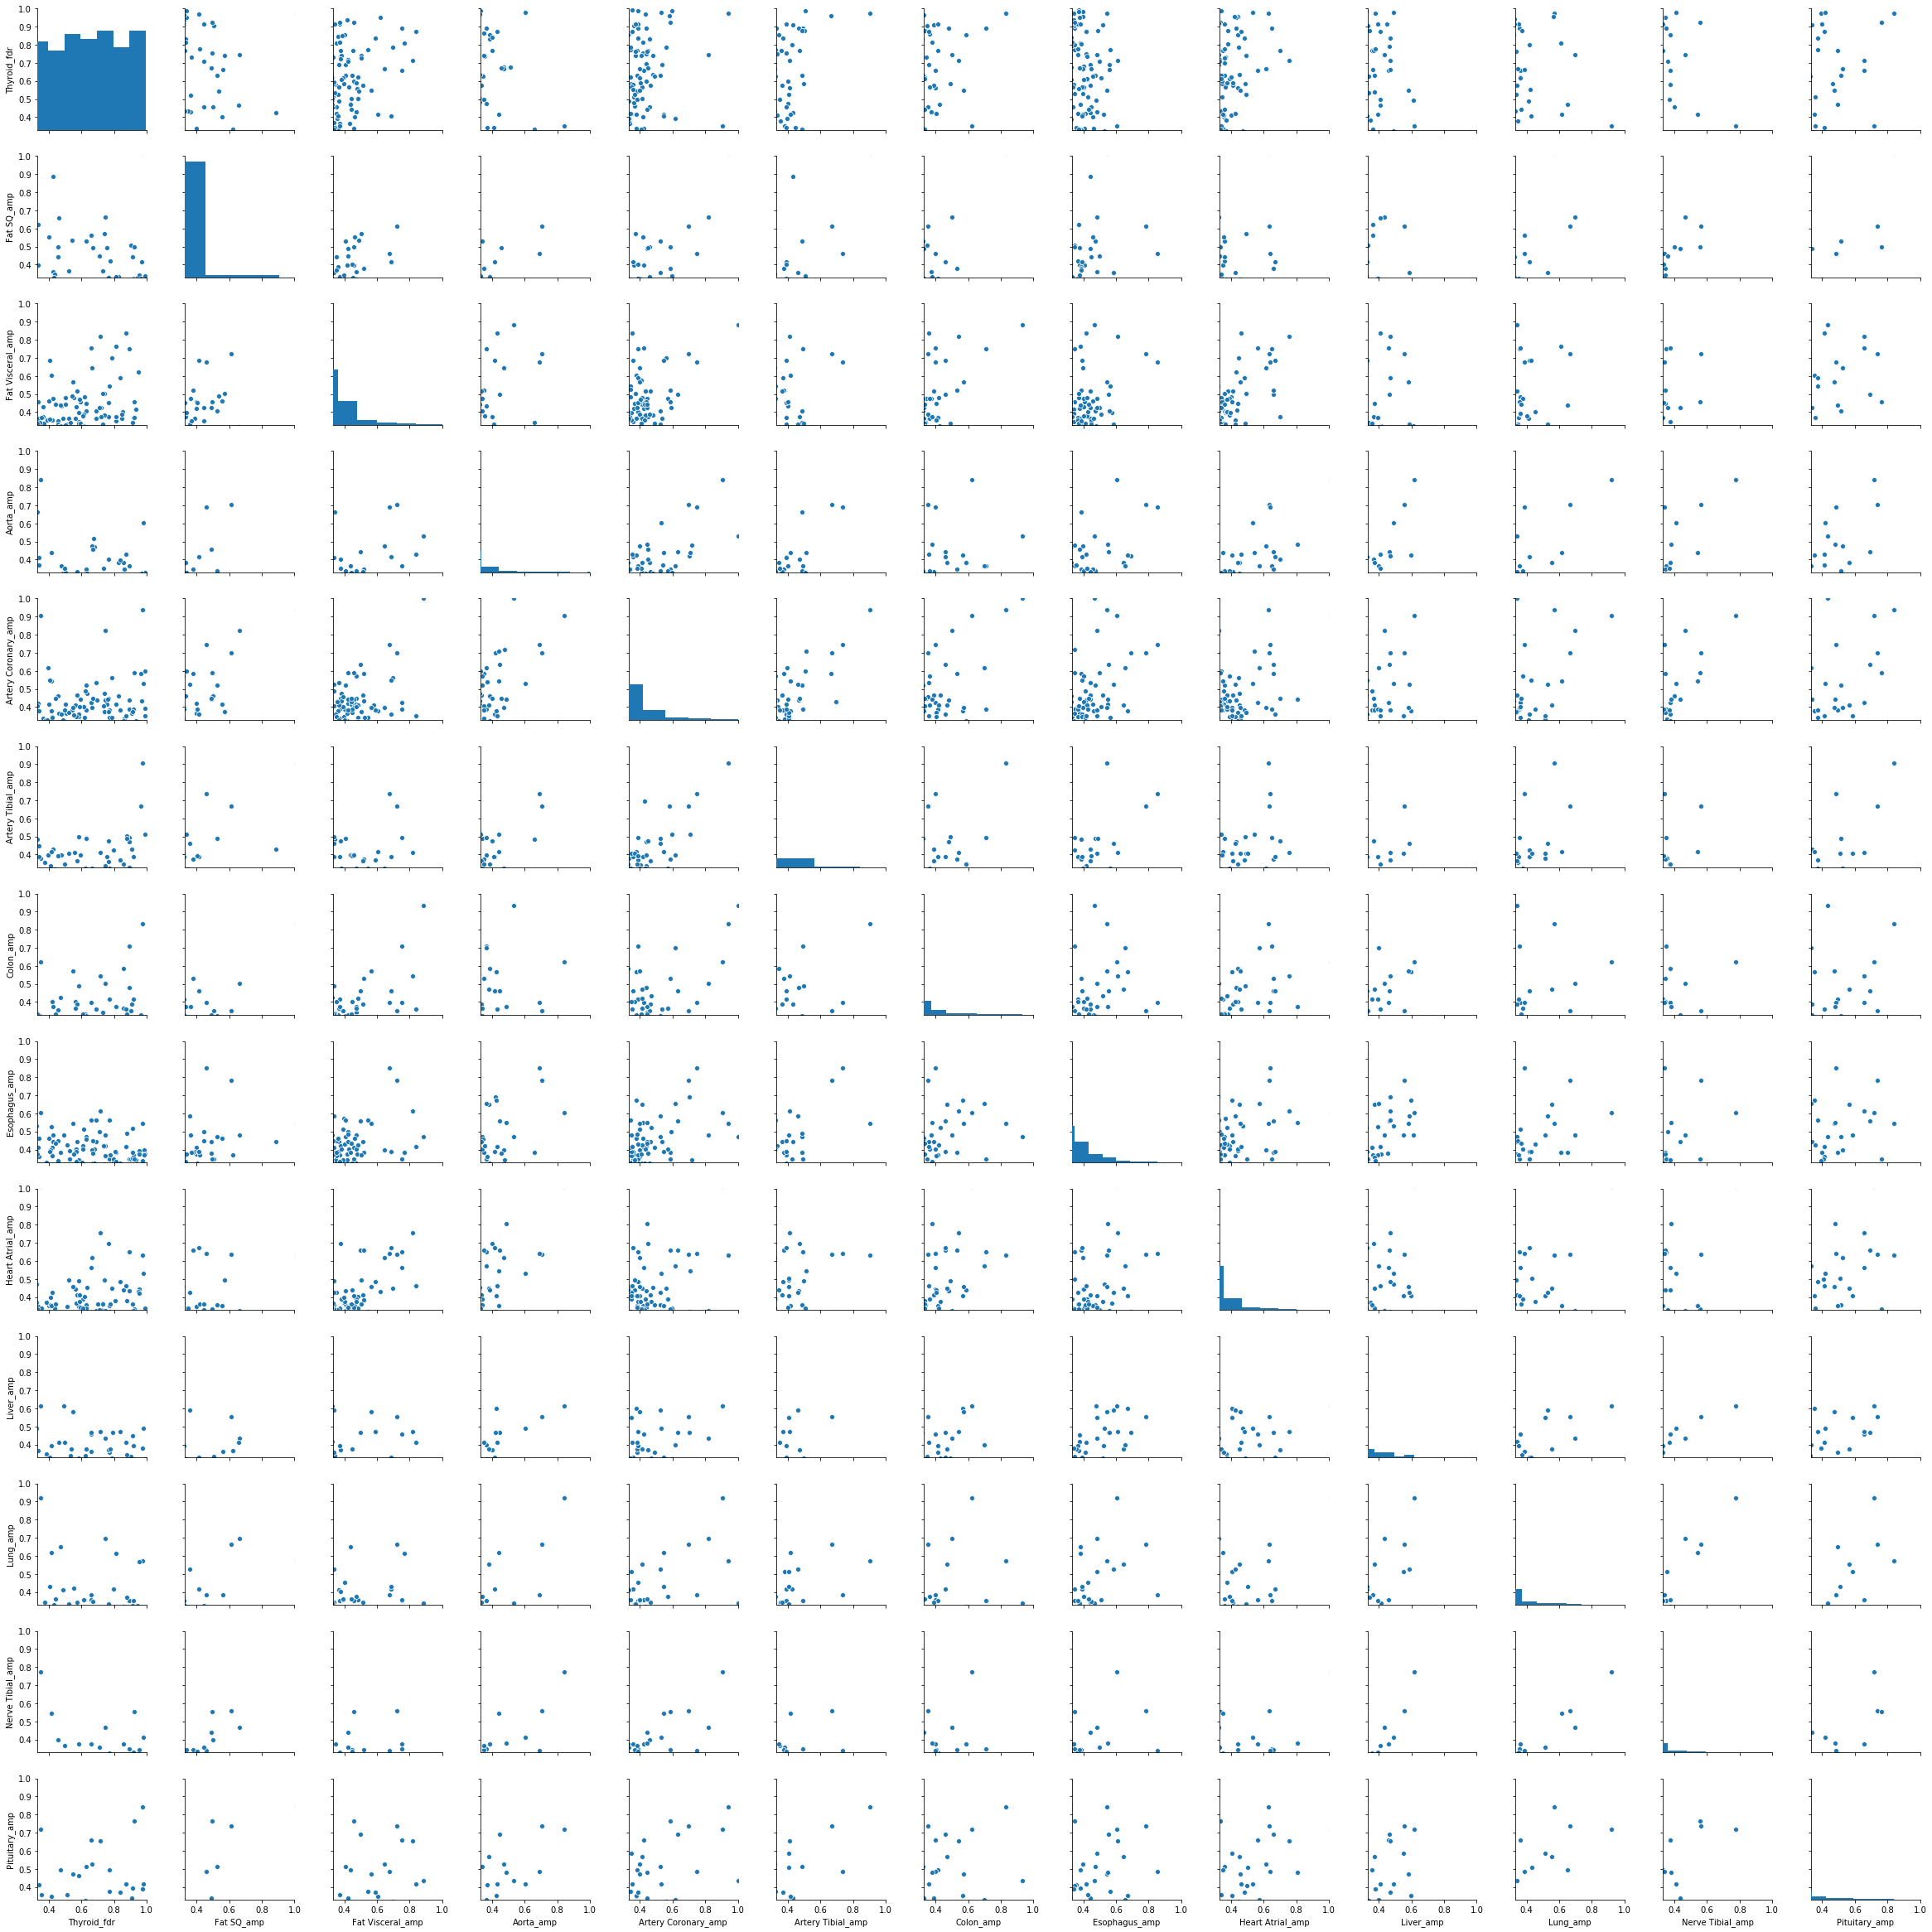

In [5]:
# Pairwise comparison of FDR across 13 tissues
plt.figure(figsize = (78, 78))
g = sns.pairplot(circa_db_sub.iloc[:,range(0,13)])
g.set(xlim = (0,0.05))
g.set(ylim = (0,0.05))
plt.tight_layout()
plt.savefig('plot/circa_db_fdr_compare.pdf')

# Pairwise comparison of amplitude across 13 tissues
plt.figure(figsize = (78,78))
g = sns.pairplot(circa_db_sub.iloc[:,range(13,26)])
g.set(xlim = (0.33,1))
g.set(ylim = (0.33,1))
plt.tight_layout()
plt.savefig('plot/circa_db_amp_compare.pdf')